## 3.1 Backtest a simple trading strategy 

**Created by: Pengfei Zhao**  
**© 2025 Investment Practice Course**

* A `backtest` is a historical analysis that evaluates the performance of a trading or investment strategy using historical market data. The primary purpose of a backtest is to assess how well a given trading strategy or set of trading rules would have performed in the past under specific historical market conditions. 

* Backtesting is a crucial step in the development and validation of trading strategies and is commonly used in finance and investment management.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Load and prepare Microsoft (MSFT) stock data

In [2]:
# Load MSFT stock data
msft = pd.read_csv('MSFT.csv', index_col='Date', parse_dates=True)
msft = msft[['Close']]
msft.head()

,Close
Date,
2020-10-19,214.220001
2020-10-20,214.649994
2020-10-21,214.800003
2020-10-22,214.889999
2020-10-23,216.229996


### 2. Strategy Implementation Method 1: Transaction-Based Approach (More Intuitive)

This method tracks actual buy/sell transactions:
- Buy when short MA crosses **above** long MA
- Sell when short MA crosses **below** long MA
- Hold position between signals

In [3]:
# Strategy parameters
short_window = 10  # MA10
long_window = 50   # MA50
initial_cash = 100000

In [4]:
# Calculate moving averages
msft['MA10'] = msft['Close'].rolling(window=short_window).mean()
msft['MA50'] = msft['Close'].rolling(window=long_window).mean()

In [5]:
# Remove NaN values
msft = msft.dropna()

In [6]:
# Initialize position tracking
msft['Position'] = 0
cash = initial_cash
total_profit = 0

In [7]:
# Implement transaction-based strategy
for i in range(1, len(msft)):
    if msft['MA10'].iloc[i] > msft['MA50'].iloc[i] and msft['Position'].iloc[i - 1] == 0:
        # Buy signal: MA10 crosses above MA50 and no position is open
        
        shares_to_buy = 1
        msft.iloc[i, msft.columns.get_loc('Position')] = shares_to_buy
        buy_price = msft['Close'].iloc[i]
        cash -= shares_to_buy * buy_price
        
        print(f'Buy at {msft.index[i].date()} with price ${buy_price:.2f}')
        
    elif msft['MA10'].iloc[i] < msft['MA50'].iloc[i] and msft['Position'].iloc[i - 1] > 0:
        # Sell signal: MA10 crosses below MA50 and a position is open
        
        sell_price = msft['Close'].iloc[i]
        cash += msft['Position'].iloc[i-1] * sell_price
        profit = (sell_price - buy_price) * msft['Position'].iloc[i-1]
        total_profit += profit
        
        print(f'Sell at {msft.index[i].date()} with price ${sell_price:.2f}, Profit: ${profit:.2f}')
        msft.iloc[i, msft.columns.get_loc('Position')] = 0
        
    else:
        # Hold current position
        msft.iloc[i, msft.columns.get_loc('Position')] = msft['Position'].iloc[i-1]

Buy at 2020-12-30 with price $221.68
Sell at 2021-01-15 with price $212.65, Profit: $-9.03
Buy at 2021-01-21 with price $224.97
Sell at 2021-03-30 with price $231.85, Profit: $6.88
Buy at 2021-04-05 with price $249.07
Sell at 2021-05-18 with price $243.08, Profit: $-5.99
Buy at 2021-06-14 with price $259.89
Sell at 2021-09-30 with price $281.92, Profit: $22.03
Buy at 2021-10-18 with price $307.29
Sell at 2022-01-07 with price $314.04, Profit: $6.75
Buy at 2022-03-28 with price $310.70
Sell at 2022-04-18 with price $280.52, Profit: $-30.18
Buy at 2022-07-28 with price $276.41
Sell at 2022-09-02 with price $256.06, Profit: $-20.35
Buy at 2022-11-18 with price $241.22
Sell at 2022-12-30 with price $239.82, Profit: $-1.40
Buy at 2023-02-01 with price $252.75
Sell at 2023-08-04 with price $327.78, Profit: $75.03
Buy at 2023-09-14 with price $338.70
Sell at 2023-09-20 with price $320.77, Profit: $-17.93
Buy at 2023-10-13 with price $327.73
Sell at 2024-04-22 with price $400.96, Profit: $73.2

In [8]:
# Calculate daily profit for visualization
msft['Position_Lag'] = msft['Position'].shift(1).fillna(0)
msft['Close_Prev'] = msft['Close'].shift(1)
msft['Daily_Profit'] = (msft['Close'] - msft['Close_Prev']) * msft['Position_Lag']
msft['Cumulative_Profit'] = msft['Daily_Profit'].cumsum()

In [9]:
# Calculate final portfolio value
final_value = cash + (msft['Close'].iloc[-1] * msft['Position'].iloc[-1])
print(f'\n=== Results ===')
print(f'Initial cash: ${initial_cash:.2f}')
print(f'Final portfolio value: ${final_value:.2f}')
print(f'Total profit: ${total_profit:.2f}')


=== Results ===
Initial cash: $100000.00
Final portfolio value: $100108.79
Total profit: $115.07


### 3. Visualize the cumulative profit over time

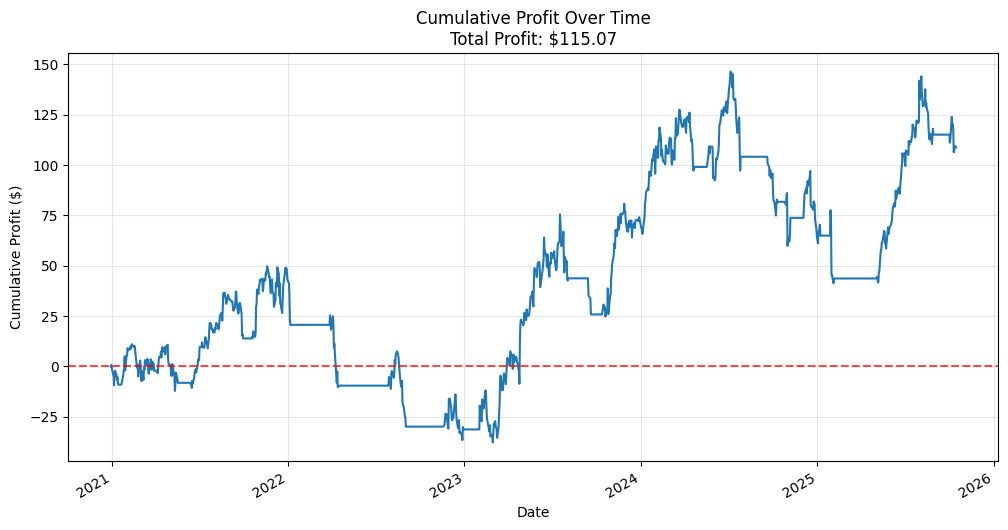

In [10]:
# Plot cumulative profit
plt.figure(figsize=(12, 6))

msft['Cumulative_Profit'].plot()

plt.axhline(y=0, color='red', linestyle='--', alpha=0.7)
plt.title(f'Cumulative Profit Over Time\nTotal Profit: ${total_profit:.2f}')
plt.xlabel('Date')
plt.ylabel('Cumulative Profit ($)')
plt.grid(True, alpha=0.3)
plt.show()